# Understanding the Iris Dataset

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [67]:
import csv
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
import sklearn as skl
from sklearn.cross_validation import train_test_split #testing & training datasets
from sklearn.preprocessing import StandardScaler #standardize data
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

### Read in the data & general stats

The first step in any analysis is to read in the data and get a feel for what you will be working with. Here, we run a simple descriptive statistic code to understand the data at a high-level. From there, we will check the metadata & quality, as well as plotting the data to see how the variables interact with eachother.  

In [56]:
iris = pd.read_csv('Iris.csv')
iris.head() #look at first 5 values

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Check metadata & data quality

In [74]:
iris.info() #check contents of data and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [73]:
iris.groupby('Species').count() #Group by species & count to ensure all species have the same numbers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


### Simple Descriptive Statistics

In [4]:
iris.describe() #describe data in Pandas

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Plot the data

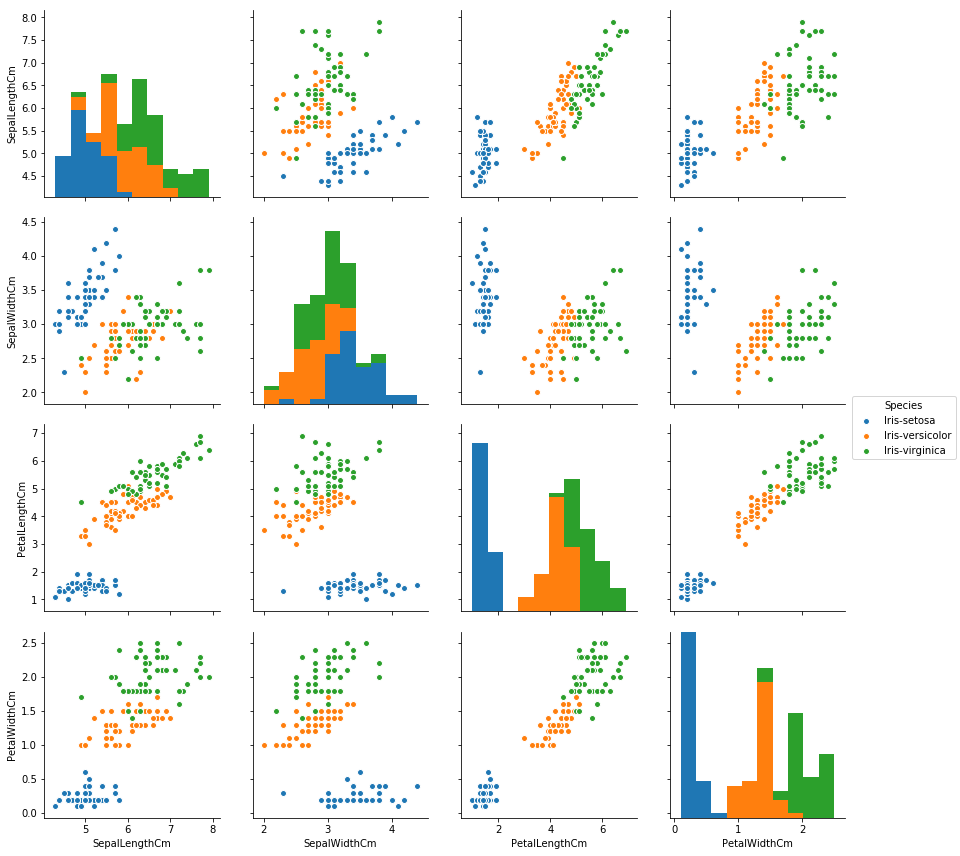

In [6]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3) #Drop the ID Column

### Initial Analysis

Note that I am only looking at the scatter graphs in the lower diagonal of the chart. The upper diagonial is just an inverted graph and gives us a different view of the data. 

We can easily distinguish Iris-setosa from the other species in almost every diagram. Specifically SepalWidthCM vs SepalLengthCM and PetalWidthCM vs PetalLengthCM. 

We can distinguish Iris-versicolor from Iris-virginica in the graphs. However, there is some overlap between the two species on all of the charts. Therefore, we should conduct further analysis to improve our confidence of distinguishing between the species. 

# Various Machine Learning Techniques

In these next steps, we are going to separate the sepal & petal data so we can begin to isolate the variables and begin testing & training our machine learning methods. 

As always, there is no one-size-fits-all machine learning method that works best for all cases. Therefore, we are going to walk through a variety of basic methods and determine which one would be the best fit for predicting the class of an Iris flower based on Petal & Sepal characteristics.  

In [75]:
# Create arrays for both petal & sepal
petal = np.array(iris[["PetalLengthCm","PetalWidthCm"]])
sepal = np.array(iris[["SepalLengthCm","SepalWidthCm"]])

keys = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2} #Creating unique keys for iris classes
classes = iris['Species'].map(keys) #mapping those keys to the qualitative values

In [49]:
# Creating testing & training datasets
#random state => allows us to replicate the results
#test_size = 0.20 because we have 2 train and 2 test datasets => 80% of data. 
#need the final 0.20 after testing & training data have been used

x_train_S, x_test_S, y_train_S, y_test_S = train_test_split(sepal,classes,test_size=0.2,random_state=33)
x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(petal,classes,test_size=0.2,random_state=33)

In [80]:
# Standardize features by removing the mean and scaling to unit variance
# Standardization of a dataset is a common requirement for many machine learning estimators: 
#they might behave badly if the individual feature do not more or less look like standard normally 
#distributed data. 
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#Esentially, we don't want our machine learning method to skew the results. So, we assign a 
#normal distribution using the existing data

scaler = StandardScaler()

scaler.fit(x_train_S)                         # Compute the mean and std to be used for later scaling.
x_train_std_S = scaler.transform(x_train_S)   # Fit to data, then transform it.
x_test_std_S = scaler.transform(x_test_S)     # Fit to data, then transform it.
print("Sepal\n" +str(x_train_std_S[:2]))

scaler.fit(x_train_P)                         # Compute the mean and std to be used for later scaling.
x_train_std_P = scaler.transform(x_train_P)   # Fit to data, then transform it.
x_test_std_P = scaler.transform(x_test_P)     # Fit to data, then transform it.
print("\nPetal\n" +str(x_train_std_P[:2]))

Sepal
[[-0.24630602 -0.75743035]
 [ 1.05418975  0.11234613]]

Petal
[[0.30129184 0.18734818]
 [0.58331228 0.45340476]]


### Decision Tree Classifier
The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

Watch out for overfitting. In this case, a max depth of 4 branches should not overfit the model. Also, we have 2 clusters that have many overlapping features (Iris-versicolor from Iris-virginica). Therefore, the decision tree can easily take the wrong path and give us an inaccurate solution. 

In [60]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4,presort=True)
model.fit(x_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(x_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(x_test_std_S, y_test_S)))

model.fit(x_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(x_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(x_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.85
Testing  Accuracy Sepal = 0.6333333333333333

Training Accuracy Petal = 0.9833333333333333
Testing  Accuracy Petal = 0.9


### Logistic Regression

Attempts to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. Used to estimate the probability of a binary response based on one or more predictor variables. 

Watch out for multicolinearity. 

In [63]:
model = LogisticRegression()
model.fit(x_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(x_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(x_test_std_S, y_test_S)))

model.fit(x_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(x_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(x_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.8166666666666667
Testing  Accuracy Sepal = 0.6666666666666666

Training Accuracy Petal = 0.95
Testing  Accuracy Petal = 0.9


### K Neighbors

Mostly used for classification problems, but can be used in regression as well. With regression, the model will use averages of the nearest neighbors. With classificaiton, the model will chose k number of the closest neighbors and determine which classification is most likely. Here, we will use this to help us determine the species of the flower. 

In [65]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(x_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(x_test_std_S, y_test_S)))

model.fit(x_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(x_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(x_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.875
Testing  Accuracy Sepal = 0.6

Training Accuracy Petal = 0.975
Testing  Accuracy Petal = 0.9666666666666667


### Random Forest

Random Forest algorithm is a supervised classification algorithm. The difference between Random Forest algorithm and the decision tree algorithm is that in Random Forest, the processes of finding the root node and splitting the feature nodes will run randomly. 

Since this is based on decision trees, make sure you keep an eye on overfitting. We do not want too many branches in the decision tree. 

In [66]:
model = RandomForestClassifier(max_depth=2)
model.fit(x_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(x_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(x_test_std_S, y_test_S)))

model.fit(x_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(x_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(x_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.8
Testing  Accuracy Sepal = 0.6666666666666666

Training Accuracy Petal = 0.975
Testing  Accuracy Petal = 0.9


### Support Vector Machines

SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. Similar to the other machine learning methods, this can be used as a classifier or regression modeler. This is also great for outlier detection. 

In [69]:
model = LinearSVC(C=10)
model.fit(x_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(x_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(x_test_std_S, y_test_S)))

model.fit(x_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(x_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(x_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.8083333333333333
Testing  Accuracy Sepal = 0.6666666666666666

Training Accuracy Petal = 0.975
Testing  Accuracy Petal = 0.9333333333333333


# Conclusion

With these Machine Learning methods, I would choose the K-Neighbors approach since its Testing & Training accuracy for both Petal and Sepal data is the highest. 

When we take a look at the graphs again, it makes intuitive sense that this would be the best model. Iris-setosa can be clearly identified and its data is visibly different than Iris-versicolor and Iris-virginica. Iris-versicolor and Iris-virginica are more difficult to distinguish because there is some overlap in both the sepal and petal characteristics. However, the overlap is on the edge of their respective max & mins from the dataset. Therefore, using the closest neighbors (data points on the graph) to help determine the species of flower makes a lot of sense in this case. 

We could also argue that we should remove Iris-setosa from the testing data because it's so easily distinguishable from the other species. Therefore, we could focus on the two species that are more difficult to distinguish and get more accurate results from our models. 